# DATA PREPARATION

In [54]:
import pandas as pd

df = pd.read_csv('dataset.csv')


columns = [
    'country', 'date', 'total_vaccinations',
    'people_vaccinated', 'people_fully_vaccinated',
    'new_vaccinations', 'population', 'continent', 
]

df = df[columns]

df = df.dropna(subset=['people_fully_vaccinated'])

df[['total_vaccinations', 'people_vaccinated', 'new_vaccinations']] = df[
    ['total_vaccinations', 'people_vaccinated', 'new_vaccinations']
].fillna(0)

df['date'] = pd.to_datetime(df['date'])

df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100

df.head(5)


,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,continent,vaccination_rate
496,Afghanistan,2021-05-11,504502.0,448878.0,55624.0,0.0,40578846.0,Asia,0.137076
505,Afghanistan,2021-05-20,547901.0,470341.0,77560.0,0.0,40578846.0,Asia,0.191134
509,Afghanistan,2021-05-24,573277.0,476367.0,96910.0,0.0,40578846.0,Asia,0.238819
511,Afghanistan,2021-05-26,590454.0,479372.0,111082.0,0.0,40578846.0,Asia,0.273744
512,Afghanistan,2021-05-27,593313.0,479574.0,113739.0,2859.0,40578846.0,Asia,0.280291


             country  vaccination_rate
164583     Gibraltar        110.188408
94778   Cook Islands         99.871160
350990         Qatar         98.607174
64308         Brunei         98.098266
295829         Nauru         95.981727


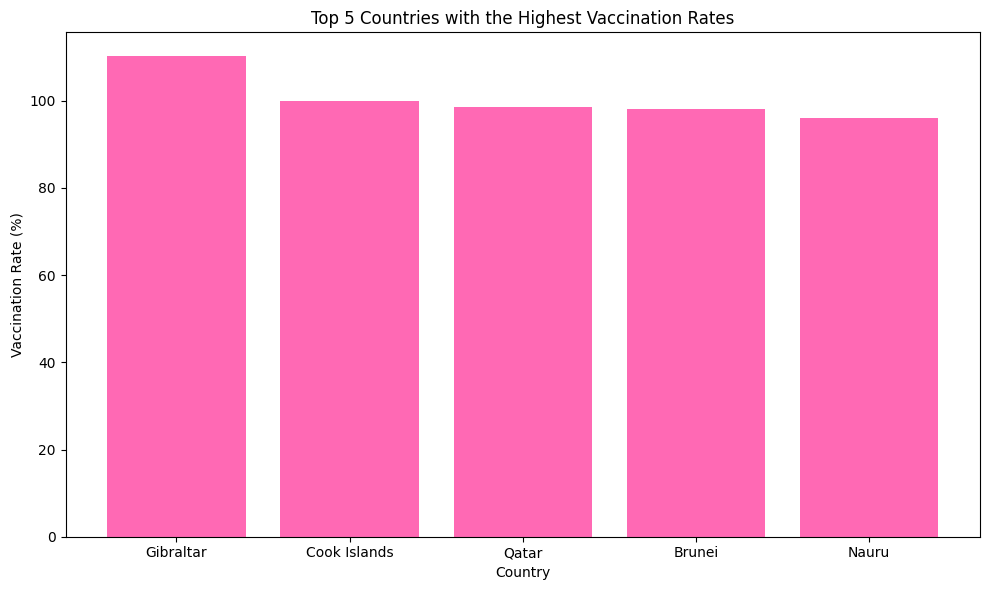

In [19]:
# latest data for each country
latest_data = df.sort_values('date').groupby('country').tail(1)

# Drop rows where population is zero or vaccination rate is NaN (to avoid division errors)
latest_data = latest_data[latest_data['population'] > 0]

# Sort by vaccination_rate descending and get top 5
top_5 = latest_data.sort_values('vaccination_rate', ascending=False).head(5)

print(top_5[['country', 'vaccination_rate']])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_5['country'], top_5['vaccination_rate'], color='hotpink')
plt.xlabel('Country')
plt.ylabel('Vaccination Rate (%)')
plt.title('Top 5 Countries with the Highest Vaccination Rates')
plt.tight_layout()
plt.show()


# Conclusion
Interestingly, several of these countries, such as Gibraltar and Cook Islands, have vaccination rates that exceed 100%, which likely includes booster shots or vaccinations for temporary residents. This highlights their strong vaccination campaigns and potentially high levels of public health infrastructure.

While these countries are performing exceptionally well, it's important to note that vaccination rates above 100% don't necessarily reflect a fully vaccinated population but rather an indication of booster shots or expanded vaccination efforts.

In general, these high rates show the dedication of countries in ensuring a high percentage of their populations are vaccinated, contributing to global efforts to control the pandemic.

date
2020-12-02      0.000000
2020-12-03      2.500000
2020-12-04      2.500000
2020-12-05      3.833333
2020-12-06      3.833333
                 ...    
2024-08-08    128.000000
2024-08-09    126.000000
2024-08-10     77.333334
2024-08-11     41.333333
2024-08-12     29.333334
Name: new_vaccinations, Length: 1350, dtype: float64

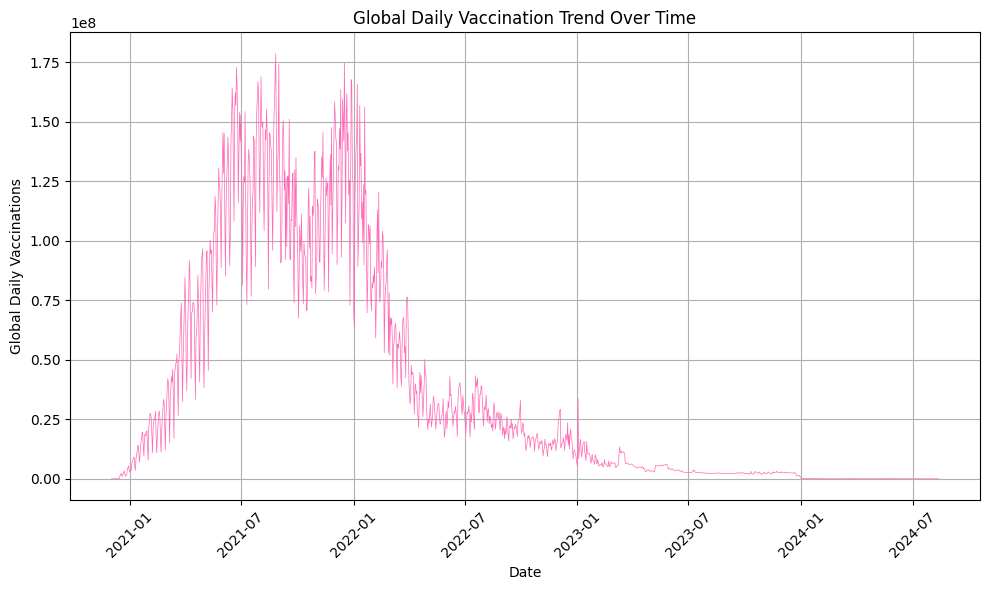

In [26]:
# Aggregate daily vaccinations across all countries
global_vaccination_trend = df.groupby('date')['new_vaccinations'].sum()

display(global_vaccination_trend)

plt.figure(figsize=(10, 6))
plt.plot(global_vaccination_trend.index, global_vaccination_trend, color='hotpink', linewidth=0.5)

# Label the axes and title
plt.xlabel('Date')
plt.ylabel('Global Daily Vaccinations')
plt.title('Global Daily Vaccination Trend Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for easier reading of values
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Conclusion
The global daily vaccination trend shows rapid growth from December 2020, peaking around mid-2021 as vaccines rolled out globally. After this peak, the trend declined, likely due to vaccine hesitancy or logistical issues. Vaccinations increased again in 2022, but the rate gradually slowed down by August 2024, as more people became vaccinated and fewer initial doses were needed.

continent
Africa           4.728689e+10
Asia             3.120609e+12
Europe           6.176597e+11
North America    5.309485e+11
Oceania          2.066169e+10
South America    4.267579e+11
Name: total_vaccinations, dtype: float64


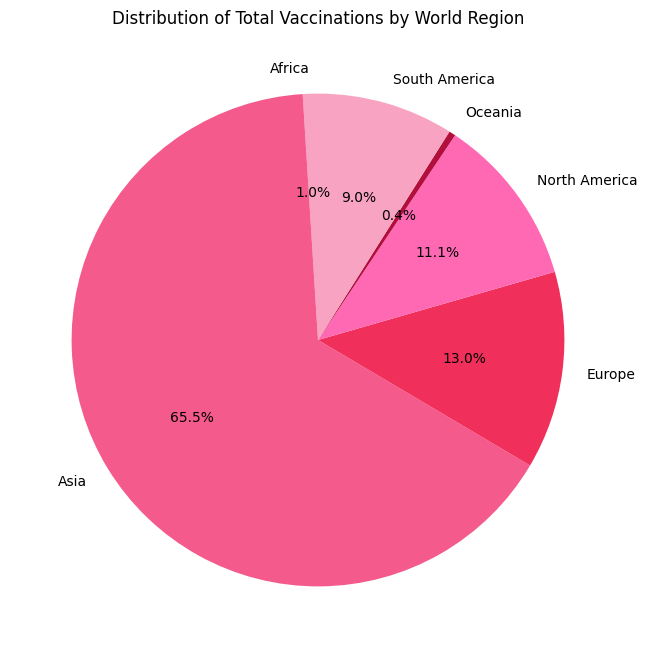

In [52]:
import matplotlib.pyplot as plt


# Group the data by region (continent) and sum the total vaccinations for each region
vaccinations_by_region = df.groupby('continent')['total_vaccinations'].sum()

pink_colors = ['#f8a3c1', '#f45a8c', '#f02f5b', 'hotpink', '#b30f3c']
print(vaccinations_by_region )
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(vaccinations_by_region, labels=vaccinations_by_region.index, autopct='%1.1f%%', startangle=90, colors=pink_colors)

# Set title
plt.title('Distribution of Total Vaccinations by World Region')

# Show the plot
plt.show()


# Conclusion
The global vaccination distribution is highly uneven across continents. Asia leads the total vaccination count by a large margin, accounting for the majority of global vaccinations. Europe and North America follow with significant contributions. However, Africa has a much lower share, reflecting the challenges it faces in vaccine access and distribution.

The vaccination rollout shows notable regional disparities, with some continents like Asia having substantial numbers due to higher population and vaccine availability, while others, particularly in Africa, still have room for considerable progress.